In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
loan_data = pd.read_csv('all_loan_Default_Copy.csv')
loan_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,C1OZ6DPJ8Y,46,15301,177267,645,0,3,21.17,24,0.31,Master,Unemployed,Divorced,Yes,Yes,Auto,No,1
1,A9S62RQ7US,25,15376,27548,760,0,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
2,1R0N3LGNRJ,36,15496,140956,752,0,1,23.94,48,0.20,Bachelor,Self-employed,NaN,Yes,No,Education,No,1
3,Y8UETC3LSG,28,15828,55923,481,0,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
4,O1IKKLC69B,19,16157,74553,498,0,2,14.00,24,0.17,Bachelor,Self-employed,Divorced,Yes,No,Education,No,1


In [5]:
# 	column_name	     Data_type	  Description

# 1	LoanID	          string	     A unique identifier for each loan.
# 2	Age	              integer	     The age of the borrower.
# 3	Income	          integer	     The annual income of the borrower.
# 4	LoanAmount	      integer	     The amount of money being borrowed.
# 5	CreditScore	      integer	     The credit score of the borrower, indicating their creditworthiness.
# 6	MonthsEmployed	  integer	     The number of months the borrower has been employed.
# 7	NumCreditLines	  integer	     The number of credit lines the borrower has open.
# 8	InterestRate	    float	       The interest rate for the loan.
# 9	Loan Term	        integer	     The term length of the loan in months.
# 10	DTIRatio	      float	       The Debt-to-Income ratio, indicating the borrower's debt compared to their income.
# 11	Education	      string	     The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School).
# 12	EmploymentType	string	     The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).
# 13	Marital Status	string	     The marital status of the borrower (Single, Married, Divorced).
# 14	HasMortgage	    string	     Whether the borrower has a mortgage (Yes or No).
# 15	HasDependents	  string	     Whether the borrower has dependents (Yes or No).
# 16	LoanPurpose	    string	     The purpose of the loan (Home, Auto, Education, Business, Other).
# 17	HasCoSigner	    string	     Whether the loan has a co-signer (Yes or No).
# 18	Default(Target)	integer	     The binary target variable indicating whether the loan defaulted (1) or not (0).


In [6]:
100*loan_data['Default'].value_counts()/len(loan_data['Default'])

# data is highly imbalanced ratio = 74.25

0    74.59541
1    25.40459
Name: Default, dtype: float64

In [7]:
loan_data['Default'].value_counts()

0    87070
1    29653
Name: Default, dtype: int64

In [8]:
# total number  of rows and column in the loan_data

loan_data.shape

(116723, 18)

In [9]:
# total number  of rows and column in the loan_data

loan_data.columns.values

array(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'], dtype=object)

In [10]:
# info() method in pandas is used to print summary of a DataFrame
#  Setting verbose=True provides a more detailed output
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116723 entries, 0 to 116722
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          116723 non-null  object 
 1   Age             116723 non-null  int64  
 2   Income          116723 non-null  int64  
 3   LoanAmount      116723 non-null  int64  
 4   CreditScore     116723 non-null  int64  
 5   MonthsEmployed  116723 non-null  int64  
 6   NumCreditLines  116723 non-null  int64  
 7   InterestRate    116723 non-null  float64
 8   LoanTerm        116723 non-null  int64  
 9   DTIRatio        116723 non-null  float64
 10  Education       116723 non-null  object 
 11  EmploymentType  116723 non-null  object 
 12  MaritalStatus   116710 non-null  object 
 13  HasMortgage     116723 non-null  object 
 14  HasDependents   116723 non-null  object 
 15  LoanPurpose     116723 non-null  object 
 16  HasCoSigner     116723 non-null  object 
 17  Default   

Text(0.5, 1.0, 'Count of target variable per category')

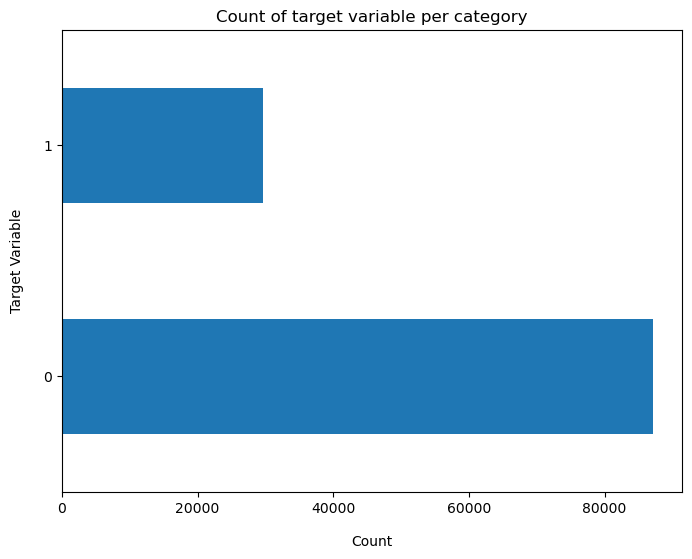

In [11]:
loan_data['Default'].value_counts().plot(kind='barh', figsize=(8,6)) #calculates the frequency of each unique value in the 'Default' column.
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14) #labelpad is used to specify the distance of the labels from the axes.
plt.title("Count of target variable per category")

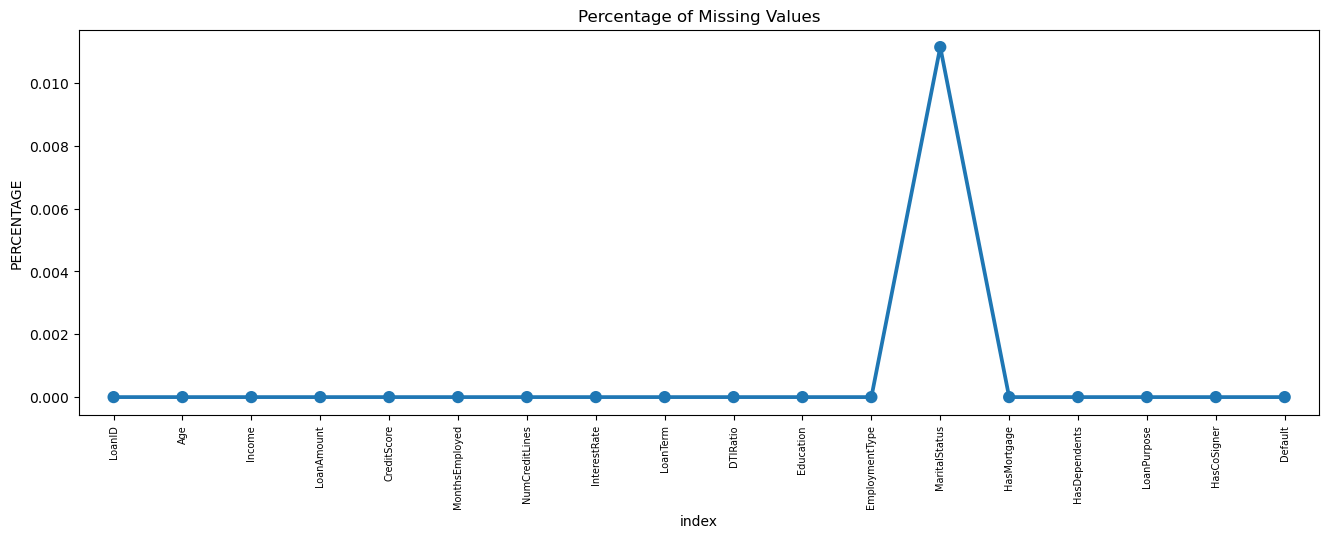

In [12]:
missing = pd.DataFrame((loan_data.isnull().sum())*100/loan_data.shape[0]).reset_index()
plt.figure(figsize =(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [13]:
# check the no of records missing in each column
loan_data.isnull().sum()

LoanID             0
Age                0
Income             0
LoanAmount         0
CreditScore        0
MonthsEmployed     0
NumCreditLines     0
InterestRate       0
LoanTerm           0
DTIRatio           0
Education          0
EmploymentType     0
MaritalStatus     13
HasMortgage        0
HasDependents      0
LoanPurpose        0
HasCoSigner        0
Default            0
dtype: int64

In [14]:
# check the records which having the missing values

loan_data.loc[loan_data['MaritalStatus'].isnull()==True]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
2,1R0N3LGNRJ,36,15496,140956,752,0,1,23.94,48,0.20,Bachelor,Self-employed,NaN,Yes,No,Education,No,1
5,LXK7UEMLK0,19,16245,163341,372,0,3,15.29,36,0.22,PhD,Part-time,NaN,Yes,No,Business,Yes,1
10,06Q275JKQB,31,16698,36578,323,0,2,22.36,24,0.81,PhD,Unemployed,NaN,No,No,Education,Yes,1
14,YH36D287WZ,24,16986,42256,695,0,4,2.51,24,0.64,Bachelor,Part-time,NaN,Yes,No,Home,Yes,1
18,8T3I0PTR35,45,17225,31177,619,0,4,16.02,48,0.29,High School,Full-time,NaN,No,Yes,Home,Yes,1
19,8VKPI6WZUY,19,17255,156730,844,0,3,21.18,60,0.20,Bachelor,Full-time,NaN,Yes,No,Education,No,1
22,UK4OH3F6QS,26,17715,103214,448,0,3,15.39,36,0.75,PhD,Full-time,NaN,No,Yes,Other,No,1
16875,JS6VXKL2TC,69,25156,162197,631,16,4,21.46,48,0.15,Bachelor,Self-employed,NaN,No,Yes,Education,No,0
16878,T5XOG0UMVW,22,25380,162261,576,16,2,19.38,48,0.40,Bachelor,Self-employed,NaN,Yes,No,Auto,No,0
16886,46S3ZSIO75,36,26282,214928,611,16,2,17.61,48,0.47,High School,Self-employed,NaN,No,Yes,Education,No,0


In [15]:
# removes rows containing any missing values from the data
# how='any' specifies that rows containing any missing values will be dropped
# inplace=True specifies that the operation should be done in place, meaning it modifies the original DataFrame telco_data_new instead of returning a new DataFrame.
loan_data.dropna(how='any',inplace=True)

In [16]:
loan_data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [17]:
loan_data.duplicated().sum()


0

In [18]:
loan_data_new=loan_data.copy()

In [19]:

loan_data_new.drop('LoanID', axis=1,inplace=True)

print(loan_data_new.columns)



Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')


In [20]:
#  Handling Categorical Columns by doing label encoding

# categorical_variables=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
#                        'HasDependents', 'LoanPurpose','HasCoSigner']


# numerical_variables=['Age', 'Income', 'LoanAmount', 'CreditScore',
#                      'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']



In [21]:
loan_data_new['EmploymentType'].unique()


array(['Unemployed', 'Full-time', 'Self-employed', 'Part-time'],
      dtype=object)

In [22]:
loan_data_new['MaritalStatus'].unique()


array(['Divorced', 'Single', 'Married'], dtype=object)

In [23]:
loan_data_new['Education'].unique()


array(['Master', 'High School', 'PhD', 'Bachelor'], dtype=object)

In [24]:
loan_data_new['HasMortgage'].unique()


array(['Yes', 'No'], dtype=object)

In [25]:
loan_data_new['HasDependents'].unique()


array(['Yes', 'No'], dtype=object)

In [26]:
loan_data_new['LoanPurpose'].unique()


array(['Auto', 'Business', 'Education', 'Home', 'Other'], dtype=object)

In [27]:
loan_data_new['HasCoSigner'].unique()


array(['No', 'Yes'], dtype=object)

In [28]:
loan_data_new['Education'] = loan_data_new['Education'].map({'High School':0,'Bachelor':1,'Master':2,'PhD':3}).astype('int')
loan_data_new['EmploymentType'] = loan_data_new['EmploymentType'].map({'Unemployed':0,'Full-time':1,'Self-employed':2,'Part-time':3}).astype('int')
loan_data_new['MaritalStatus'] = loan_data_new['MaritalStatus'].map({'Single':0,'Married':1,'Divorced':2}).astype('int')
loan_data_new['HasMortgage'] = loan_data_new['HasMortgage'].map({'Yes':1,'No':0}).astype('int')
loan_data_new['HasDependents'] = loan_data_new['HasDependents'].map({'Yes':1,'No':0}).astype('int')
loan_data_new['LoanPurpose'] = loan_data_new['LoanPurpose'].map({'Auto':0, 'Business':1, 'Education':2, 'Home':3, 'Other':4}).astype('int')
loan_data_new['HasCoSigner'] = loan_data_new['HasCoSigner'].map({'Yes':1,'No':0}).astype('int')



In [29]:
# print(loan_data_new.head())
loan_data_new.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,46,15301,177267,645,0,3,21.17,24,0.31,2,0,2,1,1,0,0,1
1,25,15376,27548,760,0,2,22.72,24,0.10,0,0,0,1,0,1,1,1
3,28,15828,55923,481,0,3,5.84,36,0.80,3,1,2,0,0,2,1,1
4,19,16157,74553,498,0,2,14.00,24,0.17,1,2,2,1,0,2,0,1
6,39,16439,160465,604,0,3,7.86,36,0.66,0,1,0,1,1,0,1,1


<Axes: >

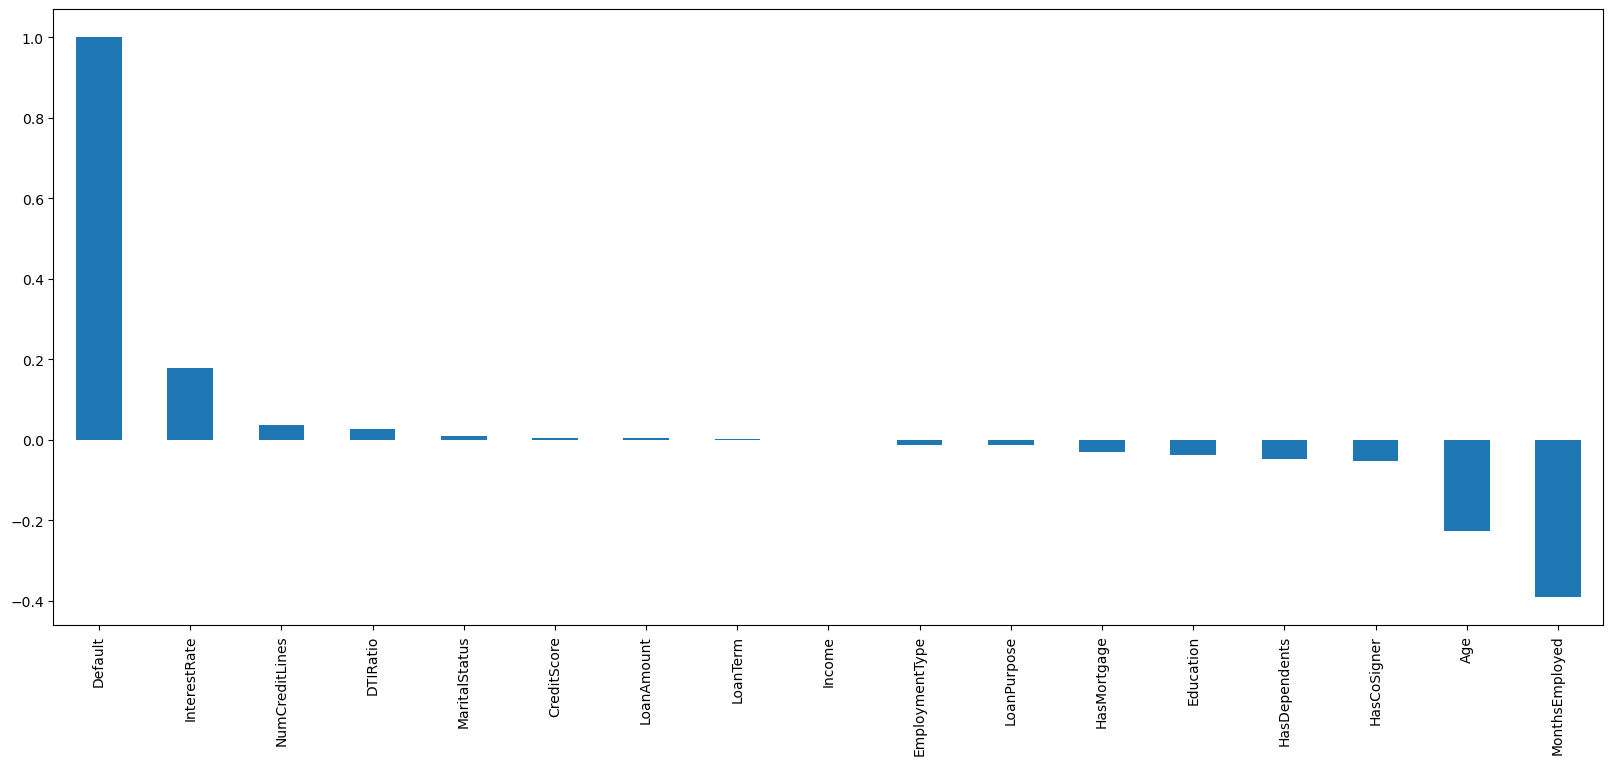

In [30]:
plt.figure(figsize=(20,8))
loan_data_new.corr()['Default'].sort_values(ascending = False).plot(kind='bar')

In [31]:
loan_data_new.drop('LoanTerm', axis=1,inplace=True)
loan_data_new.drop('MaritalStatus', axis=1,inplace=True)

print(loan_data_new.columns)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'DTIRatio', 'Education',
       'EmploymentType', 'HasMortgage', 'HasDependents', 'LoanPurpose',
       'HasCoSigner', 'Default'],
      dtype='object')


In [32]:
#  Store Feature Matrix In X And Response (Target) In Vector y

X = loan_data_new.drop('Default',axis=1)
y = loan_data_new['Default']

In [33]:
# scalingFeature
cols = ['Income','LoanAmount','CreditScore','MonthsEmployed']

In [34]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [35]:
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,46,-1.659118,0.664167,0.459188,-1.674905,3,21.17,0.31,2,0,1,1,0,0
1,25,-1.657217,-1.448886,1.182150,-1.674905,2,22.72,0.10,0,0,1,0,1,1
3,28,-1.645759,-1.048417,-0.571818,-1.674905,3,5.84,0.80,3,1,0,0,2,1
4,19,-1.637418,-0.785483,-0.464946,-1.674905,2,14.00,0.17,1,2,1,0,2,0
6,39,-1.630270,0.427032,0.201437,-1.674905,3,7.86,0.66,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116718,65,1.720391,-1.175579,1.320456,1.754507,3,20.17,0.63,0,0,1,1,0,0
116719,50,1.727337,0.723373,1.056418,1.754507,4,11.77,0.47,3,0,1,0,1,0
116720,22,1.729872,-0.573838,1.659934,1.754507,1,21.86,0.52,3,0,1,1,2,0
116721,40,1.748504,0.670221,-0.131755,1.754507,3,9.91,0.23,0,3,1,0,3,1


In [36]:
# Model building
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [37]:
# Load your dataset
data = pd.read_csv('all_loan_Default_Copy.csv')

In [38]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [41]:
lr_y_pred = lr_model.predict(X_test_scaled)

In [42]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [43]:
gb_y_pred = gb_model.predict(X_test_scaled)

NameError: name 'gb_model' is not defined

In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

In [ ]:
gb_y_pred = gb_model.predict(X_test_scaled)

In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, roc_auc, conf_matrix

In [ ]:
# Evaluate models
lr_metrics = evaluate_model(y_test, lr_y_pred)
rf_metrics = evaluate_model(y_test, rf_y_pred)
gb_metrics = evaluate_model(y_test, gb_y_pred)


In [ ]:
# Print evaluation metrics
print("Logistic Regression Metrics:")
print("Accuracy:", lr_metrics[0])
print("Precision:", lr_metrics[1])
print("Recall:", lr_metrics[2])
print("F1 Score:", lr_metrics[3])
print("ROC AUC Score:", lr_metrics[4])
print("Confusion Matrix:")
print(lr_metrics[5])
print()


In [ ]:
print("Random Forest Metrics:")
print("Accuracy:", rf_metrics[0])
print("Precision:", rf_metrics[1])
print("Recall:", rf_metrics[2])
print("F1 Score:", rf_metrics[3])
print("ROC AUC Score:", rf_metrics[4])
print("Confusion Matrix:")
print(rf_metrics[5])
print()

In [ ]:
print("Gradient Boosting Metrics:")
print("Accuracy:", gb_metrics[0])
print("Precision:", gb_metrics[1])
print("Recall:", gb_metrics[2])
print("F1 Score:", gb_metrics[3])
print("ROC AUC Score:", gb_metrics[4])
print("Confusion Matrix:")
print(gb_metrics[5])
print()

In [ ]:
import pickle
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Initialize and train the Gradient Boosting Classifier

rf_model = GradientBoostingClassifier()
rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Save the Random Forest model to a file using pickle
rf_model_file = 'gradient_boosting.pkl'
with open(rf_model_file, 'wb') as file:
    pickle.dump(rf_model, file)